# CS112 Final Project Notebook: Effect of empowerment of women on repoting crime rate

## Data Loading and Processing

In [4]:
data <- load('tables1to5.RData')

In [5]:
# 'x'
final.data = x
head(final.data)
write.csv(final.data, 'tables1to5.csv')

year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,pwomgirl,...,lpstrape,lpstpoa,lpstpcr,lparrest_womcrime,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f
1985,ANDHRA PRADESH,58733007,29755186,0.3701837,0.01159484,0.12194166,0.02943830,0.06718931,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1986,ANDHRA PRADESH,60028841,30416752,0.3218286,0.05244146,0.03141823,0.02663720,0.06629049,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1987,ANDHRA PRADESH,61324674,31078317,0.3477393,0.01025688,0.14506397,0.02868340,0.05174177,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1988,ANDHRA PRADESH,62620508,31739883,0.4270326,0.08220949,0.04052985,0.03265704,0.06434455,0.01551134,...,NA,NA,NA,-2.295828,-4.422112,-4.599128,-4.339221,-5.081269,NA,NA
1989,ANDHRA PRADESH,63916341,32401449,0.4614939,0.08195087,0.04596633,0.03595325,0.07145828,0.01564340,...,NA,NA,NA,-2.153817,-4.284273,-4.445257,-4.302086,-4.809580,NA,NA
1990,ANDHRA PRADESH,65212175,33063015,0.4658639,0.08265328,0.04235406,0.04003854,0.05710880,0.01866301,...,NA,NA,NA,-2.437914,-4.500610,-4.538616,-4.560318,-4.442914,NA,NA


In [6]:
dataset <- read.csv('tables1to5.csv')
str(colnames(dataset))

 chr [1:81] "X" "year" "stateuni" "ipop" "imale" "pcr_prop" "pcr_order" ...


In [7]:
dataset$newstateid<-as.character(dataset$stateid)
head(dataset$stateid)
head(dataset$newstateid)

[1] ANDHRA PRADESH ANDHRA PRADESH ANDHRA PRADESH ANDHRA PRADESH ANDHRA PRADESH
[6] ANDHRA PRADESH
17 Levels: ANDHRA PRADESH ASSAM BIHAR GUJARAT HARYANA ... WEST BENGAL

[1] "ANDHRA PRADESH" "ANDHRA PRADESH" "ANDHRA PRADESH" "ANDHRA PRADESH"
[5] "ANDHRA PRADESH" "ANDHRA PRADESH"

In [8]:
summary(dataset$stateid)
summary(dataset$newstateid)

ANDHRA PRADESH            ASSAM            BIHAR          GUJARAT 
              23               23               23               23 
         HARYANA HIMACHAL PRADESH  JAMMU & KASHMIR        KARNATAKA 
              23               23               23               23 
          KERALA   MADHYA PRADESH      MAHARASHTRA           ORISSA 
              23               23               23               23 
          PUNJAB        RAJASTHAN       TAMIL NADU    UTTAR PRADESH 
              23               23               23               23 
     WEST BENGAL 
              23

   Length     Class      Mode 
      391 character character 

In [9]:
#Creating a reservation year variable
dataset$year.res<-NULL
dataset$year.res[dataset$stateid == 'ANDHRA PRADESH']<-1995
dataset$year.res[dataset$stateid == 'ASSAM']<-2002
dataset$year.res[dataset$stateid == 'BIHAR']<-2001
dataset$year.res[dataset$stateid == 'GUJARAT']<-1995
dataset$year.res[dataset$stateid == 'HARYANA']<-1995
dataset$year.res[dataset$stateid == 'HIMACHAL PRADESH']<-1995
dataset$year.res[dataset$stateid == 'JAMMU & KASHMIR']<-2001
dataset$year.res[dataset$stateid == 'KARNATAKA']<-1987
dataset$year.res[dataset$stateid == 'KERALA']<-1991
dataset$year.res[dataset$stateid == 'MADHYA PRADESH']<-1994
dataset$year.res[dataset$stateid == 'MAHARASHTRA']<-1992
dataset$year.res[dataset$stateid == 'ORISSA']<-1992
dataset$year.res[dataset$stateid == 'PUNJAB']<-1994
dataset$year.res[dataset$stateid == 'RAJASTHAN']<-1995
dataset$year.res[dataset$stateid == 'TAMIL NADU']<-1996
dataset$year.res[dataset$stateid == 'UTTAR PRADESH']<-2006
dataset$year.res[dataset$stateid == 'WEST BENGAL']<-1993

In [10]:
dataset$treat <- NULL
dataset$treat <- as.integer(dataset$year >= dataset$year.res)
dataset$state <- as.integer(dataset$stateid)
#Subsetting dataset to years post-1994 and reservation post-1994
after.dataset <- dataset[which(dataset$year.res>=1995),]
after.dataset <- after.dataset[which(after.dataset$year>=1995),]
# View(better.dataset)
head(after.dataset)

,X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,...,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f,newstateid,year.res,treat,state
11,11,1995,ANDHRA PRADESH,70388808,35645714,0.3257336,0.08722978,0.04314606,0.03511922,0.2424079,...,-4.185441,-4.740167,-4.340173,-4.385282,NA,NA,ANDHRA PRADESH,1995,1,1
12,12,1996,ANDHRA PRADESH,71359008,36125997,0.3057217,0.07088103,0.04721198,0.03656161,0.2523769,...,-4.191689,-4.060709,-4.282272,-4.906383,NA,NA,ANDHRA PRADESH,1995,1,1
13,13,1997,ANDHRA PRADESH,72329207,36606280,0.3230230,0.06644619,0.06015550,0.03970733,0.2805201,...,-3.962047,-4.418194,-4.405653,-4.719733,NA,NA,ANDHRA PRADESH,1995,1,1
14,14,1998,ANDHRA PRADESH,73299407,37086563,0.3350914,0.07862274,0.06476178,0.04054603,0.2887097,...,-4.166159,-4.553323,-5.081213,-4.785575,NA,NA,ANDHRA PRADESH,1995,1,1
15,15,1999,ANDHRA PRADESH,74269607,37566847,0.3073532,0.05264603,0.07184635,0.03650214,0.3282587,...,-4.060061,-4.375981,-4.902295,-4.361103,-2.87896,-3.994414,ANDHRA PRADESH,1995,1,1
16,16,2000,ANDHRA PRADESH,75239807,38047130,0.3260641,0.04444456,0.07518627,0.03593842,0.3652063,...,-4.099138,-4.536352,-4.708059,-4.693194,NA,NA,ANDHRA PRADESH,1995,1,1


In [11]:
#Subsetting dataset to years pre-1994 and reservation pre-1994
before.dataset <- dataset[which(dataset$year.res<1995),]
before.dataset <- before.dataset[which(before.dataset$year<1995),]
# View(better.dataset)
head(before.dataset)

,X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,...,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f,newstateid,year.res,treat,state
162,162,1985,KARNATAKA,40272309,20534343,0.6110650,0.1448390,0.07300302,0.02515376,0.11753997,...,NA,NA,NA,NA,NA,NA,KARNATAKA,1987,0,8
163,163,1986,KARNATAKA,41056458,20937272,0.5563802,0.1464082,0.06396071,0.02601296,0.09900998,...,NA,NA,NA,NA,NA,NA,KARNATAKA,1987,0,8
164,164,1987,KARNATAKA,41840606,21340201,0.5894035,0.1856570,0.06644263,0.02650535,0.08170570,...,NA,NA,NA,NA,NA,NA,KARNATAKA,1987,1,8
165,165,1988,KARNATAKA,42624755,21743130,0.5734696,0.1559188,0.06737868,0.02981835,0.14668399,...,-5.043419,-4.605751,-4.734059,-6.768370,NA,NA,KARNATAKA,1987,1,8
166,166,1989,KARNATAKA,43408904,22146059,0.5705742,0.1552216,0.07337204,0.02796661,0.14932151,...,-5.076301,-4.694484,-4.408559,-5.818607,NA,NA,KARNATAKA,1987,1,8
167,167,1990,KARNATAKA,44193052,22548988,0.6182420,0.1819064,0.07483077,0.03045728,0.12640879,...,-5.166894,-5.086851,-4.320787,-5.754681,NA,NA,KARNATAKA,1987,1,8


In [12]:
## Outcome Variable
# pcr_womtat:Percent of total crime against women

## Treatment Variable
# treat : 0 if the year is before the law passed in the state, 1 otherwise

## Control Variables to Match on
# newstateid: State Name 
# pcgsdp	  : GDP per capita
# pfemale	  : Female-male Ratio
# plit  	  : Percent of Literacy
# pwlit	    : Prcent of Women's Literacy
# prural	  : Percent of rural


dim(dataset)
dim(after.dataset)
dim(before.dataset)

[1] 391  85

[1] 130  85

[1] 70 85

In [13]:
summary(as.factor(dataset$treat))
summary(as.factor(after.dataset$treat))
summary(as.factor(before.dataset$treat))

0   1 
179 212

0  1 
31 99

0  1 
48 22

Loading required package: ggplot2


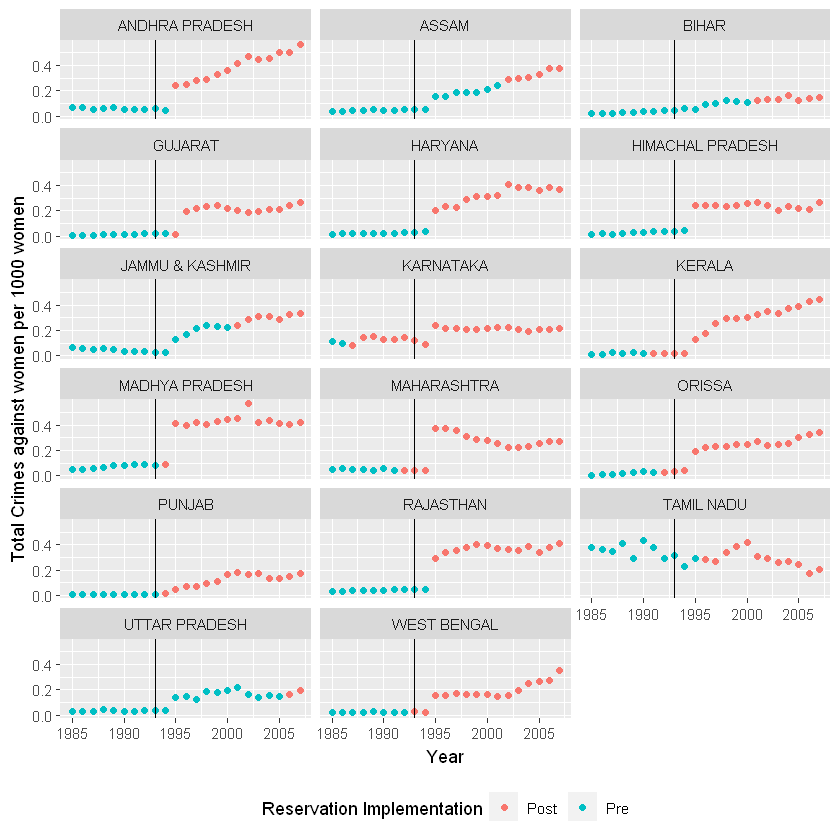

In [14]:
require('ggplot2')

############
# Figure 2 #
############

dataset$res<-"Post"
dataset$res[dataset$postwres==0]<-"Pre"

p<-ggplot(dataset, aes(y=pcr_womtot, x=year, group=newstateid, colour = factor(res))) + 
  geom_point() +facet_wrap( ~ newstateid, ncol = 3) +geom_vline(xintercept = 1993) +
  xlab("Year")+ ylab("Total Crimes against women per 1000 women") +  
  scale_colour_discrete(name = "Reservation Implementation")+theme(legend.position="bottom")

print(p)

## Table Replication

In [15]:
library(sandwich)
library(lmtest)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [16]:
# define clustered standard errors function
cl <- function(dat,fm, cluster) {
  require(sandwich, quietly = TRUE)
  require(lmtest, quietly = TRUE)
  M <- length(unique(cluster))
  N <- length(cluster)
  K <- fm$rank
  dfc <- (M/(M-1))*((N-1)/(N-K))
  uj  <- apply(estfun(fm),2, function(x) tapply(x, cluster, sum))
  vcovCL <- dfc*sandwich(fm, meat=crossprod(uj)/N)
  return(list(coeftest(fm, vcovCL), n=round(length(fm$fitted.values),0), rsq=round(summary(fm)$r.squared,2)))
}

In [17]:
##################################################################
##TABLE 1
#Analysis of the dataset in Iyer et al. on and after 1995 in states where the reservation policy was implemented in 1995 and after

#Subsetting dataset to years post-1994 and reservation post-1994
better.dataset <- dataset[which(dataset$year.res>=1995),]
better.dataset <- dataset[which(better.dataset$year>=1995),]
# View(better.dataset)
head(better.dataset)

,X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,...,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f,newstateid,year.res,treat,state,res
11,11,1995,ANDHRA PRADESH,70388808,35645714,0.3257336,0.08722978,0.04314606,0.03511922,0.2424079,...,-4.740167,-4.340173,-4.385282,NA,NA,ANDHRA PRADESH,1995,1,1,Post
12,12,1996,ANDHRA PRADESH,71359008,36125997,0.3057217,0.07088103,0.04721198,0.03656161,0.2523769,...,-4.060709,-4.282272,-4.906383,NA,NA,ANDHRA PRADESH,1995,1,1,Post
13,13,1997,ANDHRA PRADESH,72329207,36606280,0.3230230,0.06644619,0.06015550,0.03970733,0.2805201,...,-4.418194,-4.405653,-4.719733,NA,NA,ANDHRA PRADESH,1995,1,1,Post
14,14,1998,ANDHRA PRADESH,73299407,37086563,0.3350914,0.07862274,0.06476178,0.04054603,0.2887097,...,-4.553323,-5.081213,-4.785575,NA,NA,ANDHRA PRADESH,1995,1,1,Post
15,15,1999,ANDHRA PRADESH,74269607,37566847,0.3073532,0.05264603,0.07184635,0.03650214,0.3282587,...,-4.375981,-4.902295,-4.361103,-2.87896,-3.994414,ANDHRA PRADESH,1995,1,1,Post
16,16,2000,ANDHRA PRADESH,75239807,38047130,0.3260641,0.04444456,0.07518627,0.03593842,0.3652063,...,-4.536352,-4.708059,-4.693194,NA,NA,ANDHRA PRADESH,1995,1,1,Post


In [18]:
#Running the initial model with post-1995 dataset, column 1
better.dataset$newstateid<-as.character(better.dataset$stateid)
new.column1<-lm(better.dataset$lpcr_womtot ~ better.dataset$postwres + factor(better.dataset$year) + factor(better.dataset$newstateid), subset=(better.dataset$majstate==1))
summary(new.column1)


Call:
lm(formula = better.dataset$lpcr_womtot ~ better.dataset$postwres + 
    factor(better.dataset$year) + factor(better.dataset$newstateid), 
    subset = (better.dataset$majstate == 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.91519 -0.08505  0.00088  0.10176  0.69992 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                       -1.75246    0.13425 -13.054
better.dataset$postwres                            0.20821    0.09751   2.135
factor(better.dataset$year)1996                    0.38270    0.11513   3.324
factor(better.dataset$year)1997                    0.49516    0.11513   4.301
factor(better.dataset$year)1998                    0.56664    0.11513   4.922
factor(better.dataset$year)1999                    0.58801    0.11513   5.107
factor(better.dataset$year)2000                    0.60838    0.11513   5.284
factor(better.dataset$year)2001                    0.62751    0.11

In [19]:
column1.cl<- cl(better.dataset, new.column1, better.dataset$newstateid)
column1.cl

[[1]]

t test of coefficients:

                                                     Estimate  Std. Error
(Intercept)                                       -1.7525e+00  2.1831e-01
better.dataset$postwres                            2.0821e-01  1.1064e-01
factor(better.dataset$year)1996                    3.8270e-01  2.7883e-01
factor(better.dataset$year)1997                    4.9516e-01  2.8622e-01
factor(better.dataset$year)1998                    5.6664e-01  2.9932e-01
factor(better.dataset$year)1999                    5.8801e-01  2.9469e-01
factor(better.dataset$year)2000                    6.0838e-01  2.8010e-01
factor(better.dataset$year)2001                    6.2751e-01  2.8098e-01
factor(better.dataset$year)2002                    6.9596e-01  2.7692e-01
factor(better.dataset$year)2003                    6.4287e-01  2.9687e-01
factor(better.dataset$year)2004                    6.9375e-01  3.0588e-01
factor(better.dataset$year)2005                    6.7132e-01  3.0401e-01
factor

In [20]:
#Running the initial model with post-1995 dataset, column 6
better.dataset$newstateid<-as.character(better.dataset$stateid)
new.total.crimes<-lm(better.dataset$lpcr_womtot ~ better.dataset$postwres + better.dataset$newstateid:better.dataset$year + better.dataset$pfemale + better.dataset$prural + better.dataset$plit + better.dataset$pfarm + better.dataset$womancm + better.dataset$pcgsdp + better.dataset$ppol_strengt +
              factor(better.dataset$year) + factor(better.dataset$newstateid), subset=(better.dataset$year>=1985 & better.dataset$majstate==1))
summary(new.total.crimes)


Call:
lm(formula = better.dataset$lpcr_womtot ~ better.dataset$postwres + 
    better.dataset$newstateid:better.dataset$year + better.dataset$pfemale + 
    better.dataset$prural + better.dataset$plit + better.dataset$pfarm + 
    better.dataset$womancm + better.dataset$pcgsdp + better.dataset$ppol_strengt + 
    factor(better.dataset$year) + factor(better.dataset$newstateid), 
    subset = (better.dataset$year >= 1985 & better.dataset$majstate == 
        1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05213 -0.09026 -0.00074  0.07835  0.65888 

Coefficients: (1 not defined because of singularities)
                                                                Estimate
(Intercept)                                                   1402.59546
better.dataset$postwres                                         -0.04511
better.dataset$pfemale                                        -925.37030
better.dataset$prural                                         -103.07092
better.da

In [21]:
column2.cl<- cl(better.dataset, new.total.crimes, better.dataset$newstateid)
column2.cl

[[1]]

t test of coefficients:

                                                                 Estimate
(Intercept)                                                   1402.595459
better.dataset$postwres                                         -0.045107
better.dataset$pfemale                                        -925.370299
better.dataset$prural                                         -103.070923
better.dataset$plit                                           -154.680564
better.dataset$pfarm                                          -368.734630
better.dataset$womancm                                           0.103807
better.dataset$pcgsdp                                            1.089607
better.dataset$ppol_strengt                                     -0.022301
factor(better.dataset$year)1996                                  0.783919
factor(better.dataset$year)1997                                  1.362176
factor(better.dataset$year)1998                                  1.853869
factor

In [22]:
#Table 3 column 1 code for total crimes against women in Iyer
model1w<-lm(dataset$lpcr_womtot ~ dataset$postwres +  
              factor(dataset$year) + factor(dataset$newstateid), subset=(dataset$year>=1985 & dataset$majstate==1))
summary(model1w)


Call:
lm(formula = dataset$lpcr_womtot ~ dataset$postwres + factor(dataset$year) + 
    factor(dataset$newstateid), subset = (dataset$year >= 1985 & 
    dataset$majstate == 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.82621 -0.21707  0.00651  0.25783  1.56950 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                -3.14521    0.15331 -20.515  < 2e-16
dataset$postwres                            0.36511    0.09573   3.814 0.000162
factor(dataset$year)1986                    0.15913    0.16649   0.956 0.339817
factor(dataset$year)1987                    0.12377    0.16658   0.743 0.457995
factor(dataset$year)1988                    0.27887    0.16658   1.674 0.095012
factor(dataset$year)1989                    0.36170    0.16658   2.171 0.030579
factor(dataset$year)1990                    0.30469    0.16658   1.829 0.068237
factor(dataset$year)1991                    0.25821    0.16687

In [23]:
model1cw<- cl(dataset, model1w, dataset$newstateid)
model1cw

[[1]]

t test of coefficients:

                                              Estimate  Std. Error     t value
(Intercept)                                -3.1452e+00  2.3829e-01 -1.3199e+01
dataset$postwres                            3.6511e-01  1.9031e-01  1.9185e+00
factor(dataset$year)1986                    1.5913e-01  1.5517e-01  1.0255e+00
factor(dataset$year)1987                    1.2377e-01  1.7864e-01  6.9280e-01
factor(dataset$year)1988                    2.7887e-01  1.8055e-01  1.5446e+00
factor(dataset$year)1989                    3.6170e-01  2.0170e-01  1.7933e+00
factor(dataset$year)1990                    3.0469e-01  2.2600e-01  1.3482e+00
factor(dataset$year)1991                    2.5821e-01  2.0731e-01  1.2455e+00
factor(dataset$year)1992                    2.8438e-01  2.0276e-01  1.4026e+00
factor(dataset$year)1993                    3.2019e-01  2.1805e-01  1.4684e+00
factor(dataset$year)1994                    2.7934e-01  2.5292e-01  1.1045e+00
factor(dataset$year)

In [24]:
# Table 3 column 6 code for total crimes against women in Iyer
model6w<-lm(dataset$lpcr_womtot ~ dataset$postwres + dataset$newstateid:dataset$year + dataset$pfemale + dataset$prural + dataset$plit + dataset$pfarm + dataset$womancm + dataset$pcgsdp + dataset$ppol_strengt +
              factor(dataset$year) + factor(dataset$newstateid), subset=(dataset$year>=1985 & dataset$majstate==1))
summary(model6w)


Call:
lm(formula = dataset$lpcr_womtot ~ dataset$postwres + dataset$newstateid:dataset$year + 
    dataset$pfemale + dataset$prural + dataset$plit + dataset$pfarm + 
    dataset$womancm + dataset$pcgsdp + dataset$ppol_strengt + 
    factor(dataset$year) + factor(dataset$newstateid), subset = (dataset$year >= 
    1985 & dataset$majstate == 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87459 -0.11660 -0.00157  0.12497  0.70362 

Coefficients: (1 not defined because of singularities)
                                                  Estimate Std. Error t value
(Intercept)                                     -1.815e+01  5.308e+01  -0.342
dataset$postwres                                 2.288e-01  6.158e-02   3.716
dataset$pfemale                                 -2.046e+01  1.045e+01  -1.958
dataset$prural                                   1.184e+01  4.436e+00   2.668
dataset$plit                                    -2.896e+00  3.615e+00  -0.801
dataset$pfarm            

In [25]:
model6cw<- cl(dataset, model6w, dataset$newstateid)
model6cw

[[1]]

t test of coefficients:

                                                   Estimate  Std. Error t value
(Intercept)                                     -1.8151e+01  9.9215e+01 -0.1829
dataset$postwres                                 2.2885e-01  8.4441e-02  2.7102
dataset$pfemale                                 -2.0461e+01  1.8347e+01 -1.1153
dataset$prural                                   1.1835e+01  7.0727e+00  1.6734
dataset$plit                                    -2.8955e+00  5.1406e+00 -0.5633
dataset$pfarm                                    1.6149e+01  1.3363e+01  1.2085
dataset$womancm                                 -6.4402e-02  7.0851e-02 -0.9090
dataset$pcgsdp                                  -1.8927e-01  1.0245e-01 -1.8474
dataset$ppol_strengt                            -9.1816e-02  5.3947e-02 -1.7020
factor(dataset$year)1986                         2.0723e-01  1.5085e-01  1.3737
factor(dataset$year)1987                         2.4650e-01  1.8910e-01  1.3036
factor(d

In [26]:
# Outputting the results from the model restricted to post-1995
table2.1<-as.matrix(c(round(column1.cl[[1]]["better.dataset$postwres",1],3),paste("[",round(column1.cl[[1]]["better.dataset$postwres",2],3),"]"),round(column1.cl[[3]],2), round(column1.cl[[2]],0) ))
table2.2<-as.matrix(c(round(column2.cl[[1]]["better.dataset$postwres",1],3),paste("[",round(column2.cl[[1]]["better.dataset$postwres",2],3),"]"),round(column2.cl[[3]],2), round(column2.cl[[2]],0) ))
table2.3<-as.matrix(c(round(model1cw[[1]]["dataset$postwres",1],3),paste("[",round(model1cw[[1]]["dataset$postwres",2],3),"]"),round(model1cw[[3]],2), round(model1cw[[2]],0) ))
table2.4<-as.matrix(c(round(model6cw[[1]]["dataset$postwres",1],3),paste("[",round(model6cw[[1]]["dataset$postwres",2],3),"]"),round(model6cw[[3]],2), round(model6cw[[2]],0) ))

In [27]:
table2_out <- matrix(NA,nrow=8,ncol=2)
table2_out[1:4,1] <- table2.1
table2_out[1:4,2] <- table2.2
table2_out[5:8,1] <- table2.3
table2_out[5:8,2] <- table2.4
colnames(table2_out) <- c("No controls (1)", "Control for state-specific time trends + other controls (2)")
rownames(table2_out)<- c("Total crimes against women per 1,000 women", "", "R2", "Observations",
                         "Total crimes against women per 1,000 women", "", "R2", "Observations")

(table2_out)

,No controls (1),Control for state-specific time trends + other controls (2)
"Total crimes against women per 1,000 women",0.208,-0.045
,[ 0.111 ],[ 0.109 ]
R2,0.76,0.88
Observations,130,130
"Total crimes against women per 1,000 women",0.365,0.229
,[ 0.19 ],[ 0.084 ]
R2,0.85,0.95
Observations,391,391



% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Fri, Apr 24, 2020 - 4:06:34 AM
\begin{table}[!htbp] \centering 
  \caption{Women's Political Representation and Crimes against Women} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} ccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & No controls (1) & Control for state-specific time trends + other controls (2) \\ 
\hline \\[-1.8ex] 
Total.crimes.against.women.per.1.000.women & 0.208 & -0.045 \\ 
X & [ 0.111 ] & [ 0.109 ] \\ 
R2 & 0.76 & 0.88 \\ 
Observations & 130 & 130 \\ 
Total.crimes.against.women.per.1.000.women.1 & 0.365 & 0.229 \\ 
X.1 & [ 0.19 ] & [ 0.084 ] \\ 
R2.1 & 0.85 & 0.95 \\ 
Observations.1 & 391 & 391 \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 


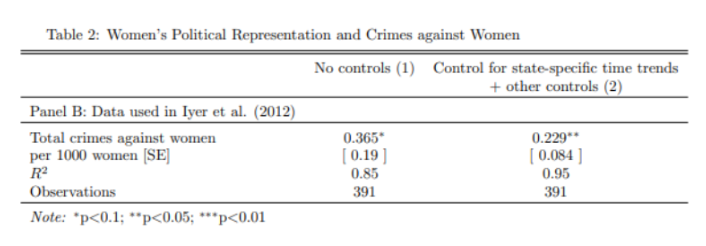

In [36]:
library(stargazer)
library("IRdisplay")
stargazer(table2_out,title="Women's Political Representation and Crimes against Women")
display_png(file="Capture.PNG")

Above you can see the LaTex code for the table created by the R code. I pasted this code in the online LaTex Editor and got the following table as an output. This table has panel A but for the sake of this assignment we discarded that Panel and kept this table that was presented in the original paper')


## Replication with Matching and Genetic Matching

## Simple Matching

In [81]:
library(Matching)
library(rgenoud)
attach(after.dataset)
X = cbind(state, pcgsdp, pfemale, plit, pwlit, prural)
X.all = cbind(state, pcgsdp, pfemale, plit, pwlit, prural, state^2, pcgsdp^2, pfemale^2, plit^2, pwlit^2, prural^2, 
          state*pcgsdp, state*pfemale, state*plit, state*pwlit, state*prural,
          pcgsdp*pfemale, pcgsdp*plit, pcgsdp*pwlit, pcgsdp*prural,
          pfemale*plit, pfemale*pwlit, pfemale*prural, plit*pwlit, plit*prural, pwlit*prural)
Tr = treat
Y = pcr_womtot
detach(after.dataset)

#Checking the balance

mtch <- Match(Y=Y, Tr=Tr, X=X, M=1)
MatchBalance(treat ~ state + pcgsdp + pfemale + plit + pwlit + prural, data=dataset, match.out=mtch)
summary(mtch)

The following object is masked _by_ .GlobalEnv:

    X




***** (V1) state *****
                       Before Matching 	 	 After Matching
mean treatment........     9.1981 	 	     3.2424 
mean control..........     8.7654 	 	     3.3737 
std mean diff.........     9.5532 	 	    -8.8412 

mean raw eQQ diff.....     1.1285 	 	    0.57576 
med  raw eQQ diff.....          1 	 	          1 
max  raw eQQ diff.....          3 	 	          1 

mean eCDF diff........   0.066599 	 	    0.09596 
med  eCDF diff........   0.069701 	 	   0.090909 
max  eCDF diff........    0.15758 	 	    0.17172 

var ratio (Tr/Co).....    0.72526 	 	    0.60867 
T-test p-value........    0.39191 	 	    0.33667 
KS Bootstrap p-value..      0.004 	 	      0.034 
KS Naive p-value......    0.01613 	 	    0.10794 
KS Statistic..........    0.15758 	 	    0.17172 


***** (V2) pcgsdp *****
                       Before Matching 	 	 After Matching
mean treatment........     2.0496 	 	     1.6642 
mean control..........      1.229 	 	     2.1333 
std mean diff.........     108.

## Genetic Matching

In [51]:
genout = GenMatch(Tr = Tr, X = X, M=1, pop.size = 250,
                  max.generations = 20, wait.generations = 25,
                  exact = c(T, F, F, F, F, F))
mout = Match(Tr = Tr, X = X, M=1, Weight.matrix = genout,
                  exact = c(T, F, F, F, F, F))
summary(mout)

Warning message:
"package 'rgenoud' was built under R version 3.6.3"##  rgenoud (Version 5.8-3.0, Build Date: 2019-01-22)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimization Using Derivatives: The rgenoud package for R.''
##   Journal of Statistical Software, 42(11): 1-26. 
##

The following object is masked _by_ .GlobalEnv:

    X





Tue Apr 21 17:36:59 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	30
	(2) Uniform Mutation.................. 	31
	(3) Boundary Mutation................. 	31
	(4) Non-Uniform Mutation.............. 	31
	(5) Polytope Crossover................ 	31
	(6) Simple Crossover.................. 	32
	(7) Whole Non-Uniform Mutation........ 	31
	(8) Heuristic Crossover............... 	32
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 20
Maximum Nonchanging Generations: 25
Population size       : 250
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
No


Estimate...  0 
SE.........  0 
T-stat.....  NaN 
p.val......  NA 

Original number of observations..............  130 
Original number of treated obs...............  99 
Matched number of observations...............  34 
Matched number of observations  (unweighted).  34 

Number of obs dropped by 'exact' or 'caliper'  65 



In [67]:
attach(before.dataset)
X = cbind(state, pcgsdp, pfemale, plit, pwlit, prural)
X.all = cbind(state, pcgsdp, pfemale, plit, pwlit, prural,
              state^2, pcgsdp^2, pfemale^2, plit^2, pwlit^2, prural^2, 
              state*pcgsdp, state*pfemale, state*plit, state*pwlit, state*prural,
              pcgsdp*pfemale, pcgsdp*plit, pcgsdp*pwlit, pcgsdp*prural,
              pfemale*plit, pfemale*pwlit, pfemale*prural, plit*pwlit, plit*prural, pwlit*prural)
Tr = treat
Y = pcr_womtot
detach(before.dataset)

genout = GenMatch(Tr = Tr, X = X, M=1, pop.size = 250,
                  max.generations = 20, wait.generations = 25,
                  exact = c(T, F, F, F, F, F))
mout = Match(Tr = Tr, X = X, M=1, Weight.matrix = genout,
                  exact = c(T, F, F, F, F, F))
summary(mout)
mb <- MatchBalance(treat ~ state + pcgsdp + pfemale + plit + pwlit +
                   prural, data=before.dataset, match.out=mout, nboots=500)

The following object is masked _by_ .GlobalEnv:

    X





Tue Apr 21 18:05:25 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	30
	(2) Uniform Mutation.................. 	31
	(3) Boundary Mutation................. 	31
	(4) Non-Uniform Mutation.............. 	31
	(5) Polytope Crossover................ 	31
	(6) Simple Crossover.................. 	32
	(7) Whole Non-Uniform Mutation........ 	31
	(8) Heuristic Crossover............... 	32
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 20
Maximum Nonchanging Generations: 25
Population size       : 250
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
No


Estimate...  0 
SE.........  0 
T-stat.....  NaN 
p.val......  NA 

Original number of observations..............  70 
Original number of treated obs...............  22 
Matched number of observations...............  22 
Matched number of observations  (unweighted).  22 

Number of obs dropped by 'exact' or 'caliper'  0 


***** (V1) state *****
                       Before Matching 	 	 After Matching
mean treatment........     10.273 	 	     10.273 
mean control..........     11.958 	 	     10.273 
std mean diff.........    -61.773 	 	          0 

mean raw eQQ diff.....     1.7273 	 	          0 
med  raw eQQ diff.....          2 	 	          0 
max  raw eQQ diff.....          5 	 	          0 

mean eCDF diff........    0.20833 	 	          0 
med  eCDF diff........    0.22727 	 	          0 
max  eCDF diff........    0.37879 	 	          0 

var ratio (Tr/Co).....     1.0356 	 	          1 
T-test p-value........   0.020505 	 	          1 
KS Bootstrap p-value..      0.004 	 	   

In [68]:
attach(after.dataset)
X = cbind(state, pcgsdp, pfemale, plit, pwlit, prural)
X.all = cbind(state, pcgsdp, pfemale, plit, pwlit, prural, state^2, pcgsdp^2, pfemale^2, plit^2, pwlit^2, prural^2, 
          state*pcgsdp, state*pfemale, state*plit, state*pwlit, state*prural,
          pcgsdp*pfemale, pcgsdp*plit, pcgsdp*pwlit, pcgsdp*prural,
          pfemale*plit, pfemale*pwlit, pfemale*prural, plit*pwlit, plit*prural, pwlit*prural)
Tr = treat
Y = pcr_womtot
detach(after.dataset)

genout = GenMatch(Tr = Tr, X = X.all, M=1, pop.size = 250,
                  max.generations = 20, wait.generations = 25)

The following object is masked _by_ .GlobalEnv:

    X





Tue Apr 21 18:08:31 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 
 0.000000e+00   <=  X12  <=    1.000000e+03 
 0.000000e+00   <=  X13  <=    1.000000e+03 
 0.000000e+00   <=  X14  <=    1.000000e+03 
 0.000000e+00   <=  X15  <=    1.000000e+03 
 0.000000e+00   <=  X16  <=    1.000000e+03 
 0.000000e+00   <=  X17  <=    1.000000e+03 
 0.000000e+00   <=  X18  <=    1.000000e+03 
 0.000000e+00   <=  X19  <=    1.000000e+03 
 0.000000e+00   <=  X20  <=    1.000000e+03 
 0.000000e+00   <=  X21  <=    1.000000e+03 
 0.000000e+00   <= 

In [57]:
mout = Match(Tr = Tr, X = X.all, M=1, Weight.matrix = genout, weight.matrix = 250)
summary(mout)


Estimate...  0 
SE.........  0 
T-stat.....  NaN 
p.val......  NA 

Original number of observations..............  130 
Original number of treated obs...............  99 
Matched number of observations...............  99 
Matched number of observations  (unweighted).  99 



In [58]:
mb <- MatchBalance(after.dataset$treat ~ after.dataset$state +
                   after.dataset$pcgsdp + after.dataset$pfemale +
                   after.dataset$plit + after.dataset$pwlit +
                   after.dataset$prural, match.out=mout, nboots=500)


***** (V1) after.dataset$state *****
                       Before Matching 	 	 After Matching
mean treatment........     6.9091 	 	     6.9091 
mean control..........     8.5484 	 	     9.4949 
std mean diff.........    -32.599 	 	    -51.422 

mean raw eQQ diff.....     2.1613 	 	     2.5859 
med  raw eQQ diff.....          1 	 	          1 
max  raw eQQ diff.....          9 	 	          9 

mean eCDF diff........    0.13851 	 	    0.14949 
med  eCDF diff........    0.12284 	 	    0.13131 
max  eCDF diff........    0.33464 	 	    0.39394 

var ratio (Tr/Co).....    0.65871 	 	    0.82039 
T-test p-value........    0.18686 	 	 3.7815e-05 
KS Bootstrap p-value..      0.002 	 	 < 2.22e-16 
KS Naive p-value......   0.010111 	 	 4.2529e-07 
KS Statistic..........    0.33464 	 	    0.39394 


***** (V2) after.dataset$pcgsdp *****
                       Before Matching 	 	 After Matching
mean treatment........     2.1787 	 	     2.1787 
mean control..........      1.164 	 	     1.5847 
std

In [59]:
mout = Match(Y=Y, Tr = Tr, X = X.all, M=1, Weight.matrix = genout)
summary(mout)


Estimate...  0.055201 
AI SE......  0.035548 
T-stat.....  1.5529 
p.val......  0.12046 

Original number of observations..............  130 
Original number of treated obs...............  99 
Matched number of observations...............  99 
Matched number of observations  (unweighted).  99 



In [69]:
attach(before.dataset)
X = cbind(state, pcgsdp, pfemale, plit, pwlit, prural)
X.all = cbind(state, pcgsdp, pfemale, plit, pwlit, prural, state^2, pcgsdp^2, pfemale^2, plit^2, pwlit^2, prural^2, 
          state*pcgsdp, state*pfemale, state*plit, state*pwlit, state*prural,
          pcgsdp*pfemale, pcgsdp*plit, pcgsdp*pwlit, pcgsdp*prural,
          pfemale*plit, pfemale*pwlit, pfemale*prural, plit*pwlit, plit*prural, pwlit*prural)
Tr = treat
Y = pcr_womtot
detach(before.dataset)

genout = GenMatch(Tr = Tr, X = X.all, M=1, pop.size = 250,
                  max.generations = 20, wait.generations = 25)

The following object is masked _by_ .GlobalEnv:

    X





Tue Apr 21 18:12:06 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 
 0.000000e+00   <=  X12  <=    1.000000e+03 
 0.000000e+00   <=  X13  <=    1.000000e+03 
 0.000000e+00   <=  X14  <=    1.000000e+03 
 0.000000e+00   <=  X15  <=    1.000000e+03 
 0.000000e+00   <=  X16  <=    1.000000e+03 
 0.000000e+00   <=  X17  <=    1.000000e+03 
 0.000000e+00   <=  X18  <=    1.000000e+03 
 0.000000e+00   <=  X19  <=    1.000000e+03 
 0.000000e+00   <=  X20  <=    1.000000e+03 
 0.000000e+00   <=  X21  <=    1.000000e+03 
 0.000000e+00   <= 

In [63]:
mout = Match(Tr = Tr, X = X.all, M=1, Weight.matrix = genout)
mb <- MatchBalance(treat ~ state + pcgsdp + pfemale +
                   plit + pwlit + prural, data=before.dataset, match.out=mout, nboots=500)


***** (V1) state *****
                       Before Matching 	 	 After Matching
mean treatment........     10.273 	 	     10.273 
mean control..........     11.958 	 	         11 
std mean diff.........    -61.773 	 	    -26.653 

mean raw eQQ diff.....     1.7273 	 	     1.0909 
med  raw eQQ diff.....          2 	 	          1 
max  raw eQQ diff.....          5 	 	          4 

mean eCDF diff........    0.20833 	 	    0.13636 
med  eCDF diff........    0.22727 	 	    0.13636 
max  eCDF diff........    0.37879 	 	    0.22727 

var ratio (Tr/Co).....     1.0356 	 	     1.4478 
T-test p-value........   0.020505 	 	     0.1035 
KS Bootstrap p-value..      0.006 	 	      0.356 
KS Naive p-value......   0.026361 	 	    0.62081 
KS Statistic..........    0.37879 	 	    0.22727 


***** (V2) pcgsdp *****
                       Before Matching 	 	 After Matching
mean treatment........     1.3631 	 	     1.3631 
mean control..........     1.2199 	 	     1.3985 
std mean diff.........     29.0

In [70]:
mout = Match(Y=Y, Tr = Tr, X = X.all, M=1, Weight.matrix = genout)
summary(mout)


Estimate...  0.022152 
AI SE......  0.0091262 
T-stat.....  2.4273 
p.val......  0.015211 

Original number of observations..............  70 
Original number of treated obs...............  22 
Matched number of observations...............  22 
Matched number of observations  (unweighted).  22 



In [71]:
conf.interval.95 <- function(mout){
  up = mout$est + 1.96*mout$se
  low = mout$est - 1.96*mout$se
  if (is.null(mout$se)){
    up = mout$est + 1.96*mout$se.standard
    low = mout$est - 1.96*mout$se.standard
  }
  return (paste("[",low,",",up,"]"))
}

conf.interval.95(mout)

[1] "[ 0.00426484269663614 , 0.0400393809033639 ]"